# CSCI 3022 Final Project: *Spotify Songs*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
%matplotlib inline

## Data Cleaning

In [2]:
#Importing csv file into pandas data frame
#Making sure country code NA not seen as NaN, and makingh sure missing genres are NaN
dfSong = pd.read_csv("all_spotify_data.csv",keep_default_na=False,na_values=['None','Not Found','[]'])

In [3]:
#Looking at the data
print(dfSong.info())
dfSong.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184000 entries, 0 to 183999
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Unnamed: 0   184000 non-null  int64 
 1   Artist_Name  184000 non-null  object
 2   Track_Name   184000 non-null  object
 3   Popularity   184000 non-null  int64 
 4   Track_ID     184000 non-null  object
 5   Genres       179206 non-null  object
 6   Country      184000 non-null  object
 7   Year         184000 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 11.2+ MB
None


,Unnamed: 0,Artist_Name,Track_Name,Popularity,Track_ID,Genres,Country,Year
0,0,Billie Eilish,lovely (with Khalid),90,0u2P5u6lvoDfwTYjAADbn4,"['art pop', 'electropop', 'pop']",AD,2018
1,1,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,90,3KkXRkHbMCARz0aVfEt68P,"['dfw rap', 'melodic rap', 'pop', 'rap']",AD,2018
2,2,Alec Benjamin,Let Me Down Slowly,89,2qxmye6gAegTMjLKEBoR3d,"['alt z', 'pop', 'pov: indie']",AD,2018
3,3,Calvin Harris,One Kiss (with Dua Lipa),88,7ef4DlsgrMEH11cDZd32M6,"['dance pop', 'edm', 'electro house', 'house',...",AD,2018
4,4,The Weeknd,I Was Never There,88,1cKHdTo9u0ZymJdPGSh6nq,"['canadian contemporary r&b', 'canadian pop', ...",AD,2018


In [4]:
#Dropping unnecesary columns
dfSong.drop(["Unnamed: 0","Track_ID","Year"],axis='columns',inplace=True)
print(dfSong.info())

#Removing all songs with NaN's without
dfSong_clean = dfSong.dropna(ignore_index=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184000 entries, 0 to 183999
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Artist_Name  184000 non-null  object
 1   Track_Name   184000 non-null  object
 2   Popularity   184000 non-null  int64 
 3   Genres       179206 non-null  object
 4   Country      184000 non-null  object
dtypes: int64(1), object(4)
memory usage: 7.0+ MB
None


## Popularity
#### Finding mean, median, and mode popularity score of songs:

In [5]:
#Mean
avgPop = dfSong["Popularity"].mean()
print("The mean popularity rating of all the songs is {:.2f}.".format(avgPop))

#Median
medPop = dfSong["Popularity"].median()
print("The median popularity rating of all the songs is {:.1f}.".format(medPop))

#Mode
modePop = dfSong["Popularity"].mode()
print("The mode popularity rating of all the songs is ",end="")
[print(i,end=" ") for i in modePop]; #Print all modes without brackets around array


The mean popularity rating of all the songs is 70.40.
The median popularity rating of all the songs is 71.0.
The mode popularity rating of all the songs is 69 

#### Making boxplot of popularity scores:

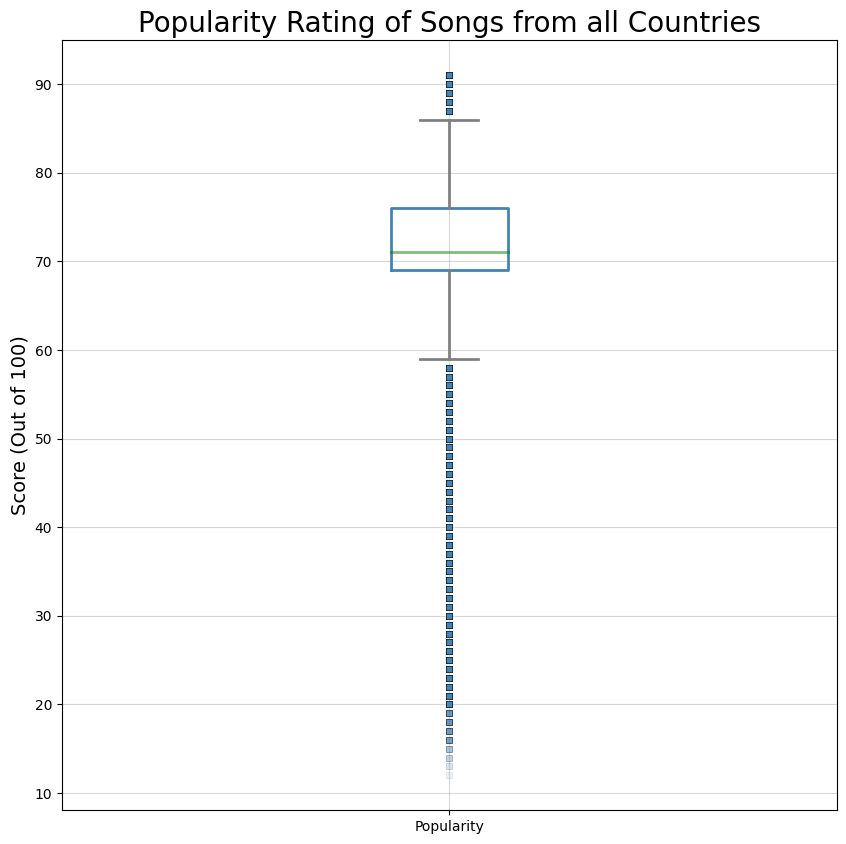

In [6]:
#Initialize figure
fig, ax = plt.subplots(figsize=(10,10))

# Plot boxplot; returns dictionary of style parameters
bpPop = dfSong.boxplot(column="Popularity",ax=ax,return_type='dict',labels=None);

# ---------------------------------------
# Set properties of various parts of plot 
# ---------------------------------------

# Change properties of boxes 
for box in bpPop['boxes']:
    box.set(color='steelblue', linewidth=2)
    
# Change properties of whiskers 
for whisker in bpPop['whiskers']:
    whisker.set(color='gray', linewidth=2)
    
# Change properties of caps 
for cap in bpPop['caps']:
    cap.set(color='gray', linewidth=2)
    
# Change properties of median 
for cap in bpPop['medians']:
    cap.set(color='green', linewidth=2, alpha=0.5)
    
# Change properties of fliers (outliers) 
for flier in bpPop['fliers']:
    flier.set(markerfacecolor='steelblue', marker='s', markersize=5, alpha=0.05, markeredgewidth=0.5)

# Make grid-lines lighter
ax.grid(alpha=0.5)
ax.set_title("Popularity Rating of Songs from all Countries", fontsize=20)
plt.xticks([1],['Popularity'])
ax.set_ylabel('Score (Out of 100)',fontsize=14);

#### Making histogram of popularity scores:

In [ ]:
#Initialize figure
fig, ax = plt.subplots(figsize=(15,10))

#Plot histogram
myBin = range(0,101,5)
dfSong["Popularity"].hist(ax=ax,bins=myBin,density=True,edgecolor='w',facecolor=(0,0,0))

#Formatting and labeling
ax.grid(alpha=0.3)
ax.set_axisbelow(True)
ax.set_title("Popularity Rating of Songs from all Countries", fontsize=20)
ax.set_xlabel("Popularity Rating (Out of 100)", fontsize=14)
ax.set_ylabel("Density", fontsize=14);

### Plotting distribution of mean popuarity scores from each country

In [ ]:
#Getting array of countries
countries = dfSong["Country"].unique()
n = countries.size #Number of countries

#Initializing array to hold mean popularity score from all countries
countryMeanPop = np.zeros(n)

#Calculating mean popularity score from all countries
for i in range(n):
    countryMeanPop[i] = dfSong.loc[dfSong['Country']==countries[i],'Popularity'].mean()

print(f"The mean of the average popularity score from each country is {countryMeanPop.mean() :.2f}")

In [ ]:
#Initializing figure
fig, ax = plt.subplots(figsize=(15,10))

#Plotting distribution
pd.Series(countryMeanPop).hist(ax=ax,bins=8,density=True,edgecolor='w')

#Formatting and labeling
ax.grid(alpha=0.3)
ax.set_axisbelow(True)
ax.set_title("Countries' Mean Popularity Scores", fontsize=20)
ax.set_xlabel("Mean Popularity Rating (Out of 100)", fontsize=14)
ax.set_ylabel("Density", fontsize=14);

## Genre

In [ ]:
#Get all generes

dfSong_clean.loc[:,"Genres"] = dfSong_clean["Genres"].apply(eval)

#Checking whether string-to-list conversion worked
# for i,l in enumerate(dfSong_clean["Genres"][:10]):
#     print("list",i,"is",type(l))

### Finding top most common genre

In [ ]:
#Getting list of unique genres and their count
genres, n = np.unique(np.hstack(dfSong_clean["Genres"].values),return_counts=True)

indBigG = np.argsort(n)[::-1] #indices of most common genre

In [ ]:
#Initializing figure
fig, ax = plt.subplots(figsize=(15,10))

#Top k common genres
k = 10
topG = np.append(genres[indBigG[:k]],['Other'])
topN = np.append(n[indBigG[:k]],[n[indBigG[k:]].sum()])
print()

#Plotting bar chart of top genre count
ax.bar(topG,topN)

#Formatting and labeling
ax.grid(alpha=0.3)
ax.set_axisbelow(True)
ax.set_title("Top {} Most Common Genres".format(k), fontsize=20)
ax.set_xlabel("Genres", fontsize=14)
ax.set_ylabel("Count", fontsize=14);
ax.set_xticks(np.arange(k+1),labels=topG)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor", fontsize=12);


### Finding mean, median, and mode of the counts for each genre

In [ ]:
#Mean
print("The mean genre count from all the songs is {:.2f}".format(np.mean(n)))

#Median
print("The median genre count from all the songs is {}".format(np.median(n)))

#Mode
print("The mode genre count from all the songs is {}".format(stats.mode(n,axis=None)[0]))


### Most common genres from each country

In [ ]:
%%time
#k most common genres from each country
countryTopG = []
for ctry in countries:
    #Getting list of unique genres and their count
    g, n = np.unique(np.hstack(dfSong_clean.loc[dfSong_clean["Country"]==ctry,"Genres"].values),return_counts=True)
    indBigG = np.argsort(n)[::-1] #indices of most common genre
    countryTopG.append(g[indBigG[0]])


In [ ]:
#Getting count of each most popular genre from each country
g, n = np.unique(np.array(countryTopG),return_counts=True)
indBigG = np.argsort(n)[::-1] #indices of most common genre

#Initializing figure
fig, ax = plt.subplots(figsize=(15,10))

#Top k common genres
k = 10 
ctopG = np.append(g[indBigG[:k]],['Other'])
ctopN = np.append(n[indBigG[:k]],[n[indBigG[k:]].sum()])

#Plotting bar chart of top genre count
ax.bar(ctopG,ctopN)

#Formatting and labeling
ax.grid(alpha=0.3)
ax.set_axisbelow(True)
ax.set_title("Most Common Genre from Each Country", fontsize=20)
ax.set_xlabel("Genres", fontsize=14)
ax.set_ylabel("Count", fontsize=14);
ax.set_xticks(np.arange(k+1),labels=ctopG)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor", fontsize=12);


### Average rating of each genre

***Cell below takes really long to compute (around a minute for me). Any way to speed it up?***

In [ ]:
%%time
#Giving songs with multiple genres a row for each genre
dfSingleG = dfSong_clean.explode(column=["Genres"],ignore_index=True)

# Create a DataFrame to hold genre-wise mean popularity
genre_popularity = dfSingleG.groupby('Genres')['Popularity'].mean()

# Create a new numpy array with genre-wise mean popularity
popGenre = np.array([genre_popularity.get(genre, 0) for genre in genres])


#### Distribution of Average Genre Ratings

In [ ]:
#Initializing figure
fig, ax = plt.subplots(figsize=(12,8))

#Plotting distribution of average genre popularity scores
pd.Series(popGenre).hist(ax=ax,bins=15,facecolor='pink',edgecolor='w',density=True)

#Formatting and labeling
ax.grid(alpha=0.3)
ax.set_axisbelow(True)
ax.set_title("Mean Popularity Rating of each Genre", fontsize=20)
ax.set_xlabel("Mean Popularity Rating", fontsize=14)
ax.set_ylabel("Density", fontsize=14);


#### Bar Chart of Genres with highest popularity ratings

In [ ]:
#Getting indices of genres with top avg popularity scores
indPopG = np.argsort(popGenre)[::-1]

#Getting top k genre avg popularity score and their genre
k = 10 
PopG = np.append(genres[indPopG[:k]],['Other']) #Genres
PopR = np.append(popGenre[indPopG[:k]],[popGenre[indPopG[k:]].mean()]) #Avg Scores

#Initializing figure
fig, ax = plt.subplots(figsize=(12,8))

#Plotting bar chart of top genre count
ax.bar(PopG,PopR)

#Formatting and labeling
ax.grid(alpha=0.3)
ax.set_axisbelow(True)
ax.set_title("Genres with Highest Average Popularity Rating", fontsize=20)
ax.set_xlabel("Genres", fontsize=14)
ax.set_ylabel("Average Rating", fontsize=14);
ax.set_xticks(np.arange(k+1),labels=PopG)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor", fontsize=12);

#Add numerical labels to bars
# def addlabels(x,y,ax):
#     for i in range(len(x)):
#         ax.text(i, y[i]//2, y[i], ha = 'center', color='w', fontsize=14)

# addlabels(PopG,PopR.round(2),ax)

#### Genre with Top Popularity Rating from each country

In [ ]:
%%time

# Create a DataFrame to hold genre-wise mean popularity in each country
countryGenrePop = dfSingleG.groupby(["Country","Genres"])['Popularity'].mean()

#Initializing arrays to hold top rated genre and rating from each country
popCtryG = np.empty(countries.size,dtype='<U35')
popCtryR = np.zeros(countries.size)

#Getting the genre with top popularity rating from each country
for i,ctry in enumerate(countries):
    df = countryGenrePop.get(ctry) #Looking at genre ratings for each country
    idx = df.idxmax() #getting top rated genre name
    popCtryG[i] = idx
    popCtryR[i] = df[idx]


In [ ]:
#Initializing figure
fig, ax = plt.subplots(figsize=(12,8))

#Plotting distribution of average genre popularity scores
pd.Series(popCtryR).hist(ax=ax,bins=10,facecolor='lightgreen',edgecolor='w',density=True)

#Formatting and labeling
ax.grid(alpha=0.3)
ax.set_axisbelow(True)
ax.set_title("Each Country's Top Genre Popularity Rating", fontsize=20)
ax.set_xlabel("Genre Popularity Rating", fontsize=14)
ax.set_ylabel("Density", fontsize=14);

In [ ]:
#Averaging reccuring Top Genres with Highest Popularity Rating from Each Country
dfCtryG = pd.DataFrame({'Genres':popCtryG,"Popularity":popCtryR}).groupby("Genres").mean().sort_values(by='Popularity',ascending=False)


In [ ]:
#Initializing figure
fig, ax = plt.subplots(figsize=(12,8))

#Plotting bar chart of top genre count
dfCtryG.plot.bar(ax=ax)

#Formatting and labeling
ax.grid(alpha=0.3)
ax.set_axisbelow(True)
ax.set_title("Top Genres with Highest Popularity Rating from Each Country", fontsize=20)
ax.set_xlabel("Genres", fontsize=14)
ax.set_ylabel("Average Rating", fontsize=14);
ax.set_xticks(np.arange(len(dfCtryG.index)),labels=dfCtryG.index)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor", fontsize=12);
ax.get_legend().remove()